# **Pengolahan Citra Menggunakan NumPy**

## **0. Import Library**

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

## **1. Load Image**

In [124]:
def read_image(filepath):
    image = plt.imread(filepath)
    return image

In [125]:
image = read_image('ayang.jpg')

In [126]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

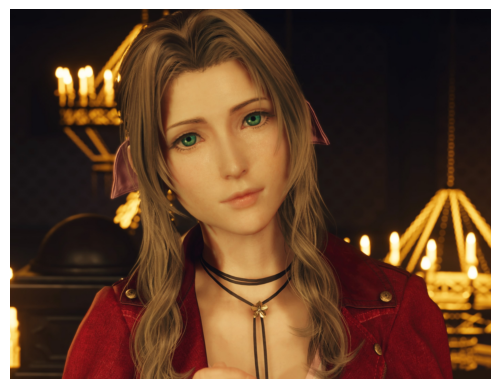

In [127]:
plt.imshow(image)
plt.axis('off')
plt.show()

## **2. Ekstrak setiap channel R, G, B**

In [128]:
def extract_channels(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    return R, G, B

In [129]:
R, G, B = extract_channels(image)

## **3. Convert ke grayscale**

In [130]:
def rgb_to_grayscale(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

In [131]:
gray_image = rgb_to_grayscale(image)

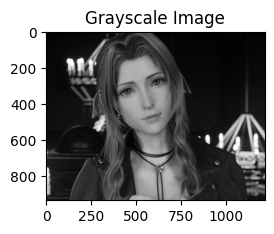

In [132]:
plt.subplot(2, 2, 1)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')

## **4. Operasikan minimal 4 kernel**

In [133]:
def apply_kernel(image, kernel):
    return ndimage.convolve(image, kernel)

In [134]:
kernel_1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernel_3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_4 = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]])

In [135]:
filtered_image_1 = apply_kernel(gray_image, kernel_1)
filtered_image_2 = apply_kernel(gray_image, kernel_2)
filtered_image_3 = apply_kernel(gray_image, kernel_3)
filtered_image_4 = apply_kernel(gray_image, kernel_4)

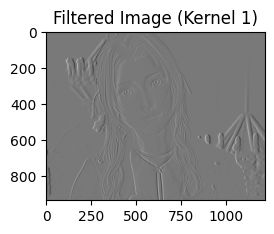

In [136]:
plt.subplot(2, 2, 2)
plt.title("Filtered Image (Kernel 1)")
plt.imshow(filtered_image_1, cmap='gray')

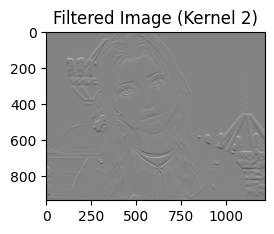

In [137]:
plt.subplot(2, 2, 2)
plt.title("Filtered Image (Kernel 2)")
plt.imshow(filtered_image_2, cmap='gray')

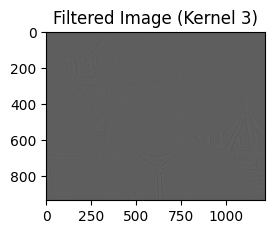

In [138]:
plt.subplot(2, 2, 2)
plt.title("Filtered Image (Kernel 3)")
plt.imshow(filtered_image_3, cmap='gray')

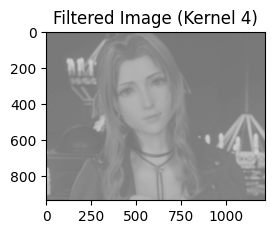

In [139]:
plt.subplot(2, 2, 2)
plt.title("Filtered Image (Kernel 4)")
plt.imshow(filtered_image_4, cmap='gray')

## **5. Operasikan pooling (avg, max)**

In [140]:
def pooling(image, size=2, stride=2, pool_type='max'):
    output_shape = ((image.shape[0] - size) // stride + 1,
                    (image.shape[1] - size) // stride + 1)
    pool_output = np.zeros(output_shape)

    for i in range(0, image.shape[0] - size + 1, stride):
        for j in range(0, image.shape[1] - size + 1, stride):
            region = image[i:i+size, j:j+size]
            if pool_type == 'max':
                pool_output[i // stride, j // stride] = np.max(region)
            elif pool_type == 'avg':
                pool_output[i // stride, j // stride] = np.mean(region)
    return pool_output

In [141]:
avg_pooled = pooling(filtered_image_1, size=2, stride=2, pool_type='avg')
max_pooled = pooling(filtered_image_1, size=2, stride=2, pool_type='max')

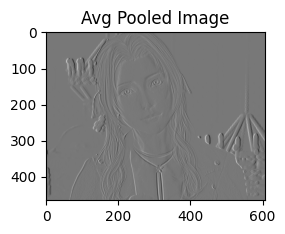

In [142]:
plt.subplot(2, 2, 4)
plt.title("Avg Pooled Image")
plt.imshow(avg_pooled, cmap='gray')

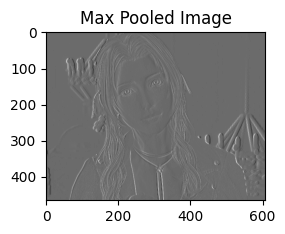

In [143]:
plt.subplot(2, 2, 3)
plt.title("Max Pooled Image")
plt.imshow(max_pooled, cmap='gray')

## **6. Operasikan flattening**

In [144]:
def flatten(image):
    return image.flatten()

In [145]:
flattened_max_pool = flatten(max_pooled)
flattened_avg_pool = flatten(avg_pooled)

In [146]:
print(f"Flattened Max Pooling Result (First 20 Elements): {flattened_max_pool[:20]}")
print(f"Flattened Avg Pooling Result (First 20 Elements): {flattened_avg_pool[:20]}")

Flattened Max Pooling Result (First 20 Elements): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Flattened Avg Pooling Result (First 20 Elements): [ 0.     0.    -0.171 -0.171  0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
